In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv file
df = pd.read_csv('Downloads/Netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# checking columns,dtype of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Checking no. of rows and cols
df.shape

(8807, 12)

In [7]:
# counting null values in each col
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Dimension of the dataframe
df.ndim

2

In [10]:
# Count of unique values in each col
for i in df.columns:
    print(i,":",df[i].nunique(),'unique values')
    print('*----------------------------------*')

show_id : 8807 unique values
*----------------------------------*
type : 2 unique values
*----------------------------------*
title : 8807 unique values
*----------------------------------*
director : 4528 unique values
*----------------------------------*
cast : 7692 unique values
*----------------------------------*
country : 748 unique values
*----------------------------------*
date_added : 1767 unique values
*----------------------------------*
release_year : 74 unique values
*----------------------------------*
rating : 17 unique values
*----------------------------------*
duration : 220 unique values
*----------------------------------*
listed_in : 514 unique values
*----------------------------------*
description : 8775 unique values
*----------------------------------*


In [11]:
# filling na values in director col with unknown
df['director'] = df['director'].fillna('Unknown')

# filling na values in cast col with unknown
df['cast'] = df['cast'].fillna('Unknown')

# changing dtype of country to string
df['country'] = df['country'].astype('str')

# splitting country list and asigning 0th element of the list to country col
df['country'] = df['country'].apply(lambda x : x.split(', ')[0])

# replacing nan with np.nan
df['country'] = df['country'].replace({'nan':np.nan})

# filling na with mode value of country col
df['country'] = df['country'].fillna(df['country'].mode()[0])

# filling na with mode value of rating col
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# replacing mis type rating with appropriate values
df['rating'] = df['rating'].replace({'TV-Y7-FV':'TV-Y7','74 min':np.nan,'84 min':np.nan,'66 min':np.nan})

# filling na with -1 in date added col 
df['date_added'] = df['date_added'].fillna(-1)

In [12]:
# checking na in dataframe
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          3
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
# checking duplication of rows in dataframe
df.duplicated().sum()

0

In [14]:
# Changing dtype of date_added col to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [15]:
# Extracting year
df['Year'] = df['date_added'].dt.year

# Extracting month
df['Month'] = df['date_added'].dt.month

# Extracting Month Name
df['Month_Name'] = df['date_added'].dt.strftime("%b")

# Extracting Week_Num
df['Week_Num']= df['date_added'].dt.strftime('%W')

# Count of Movies and TV Shows

([<matplotlib.patches.Wedge at 0x162279cf0>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6935511949239876, -0.979278683531664, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.62'),
  Text(0.4045715303723261, -0.571245898726804, '30.38')])

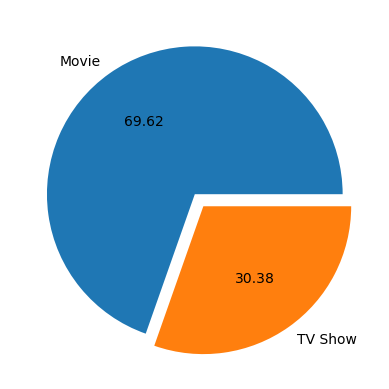

In [16]:
plt.pie(x = df['type'].value_counts().values ,labels = df['type'].value_counts().index,autopct = '%.2f',explode={0.0,0.1})

Movies are more than TV shows on the platform

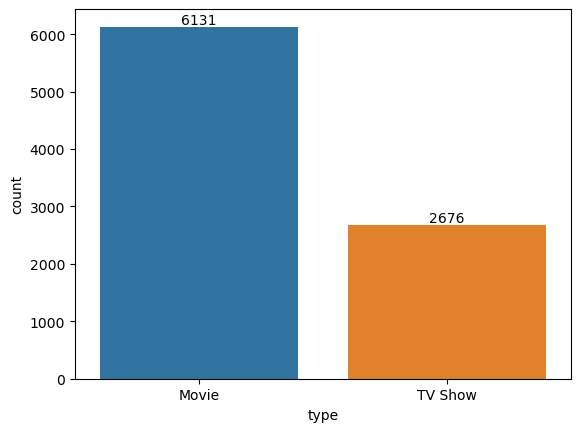

In [17]:
ax = sns.countplot(x='type',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

# Top 10 Production Countries  

In [18]:
top10_country = df['country'].str.split(', ',expand = True).stack().reset_index()
top10_country = top10_country.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'country','level_1':'cnt'})
top10_country

,country,cnt
82,United States,4041
30,India,1008
80,United Kingdom,626
11,Canada,271
37,Japan,259
21,France,212
69,South Korea,211
71,Spain,181
45,Mexico,134
2,Australia,117


Text(0, 0.5, 'Count')

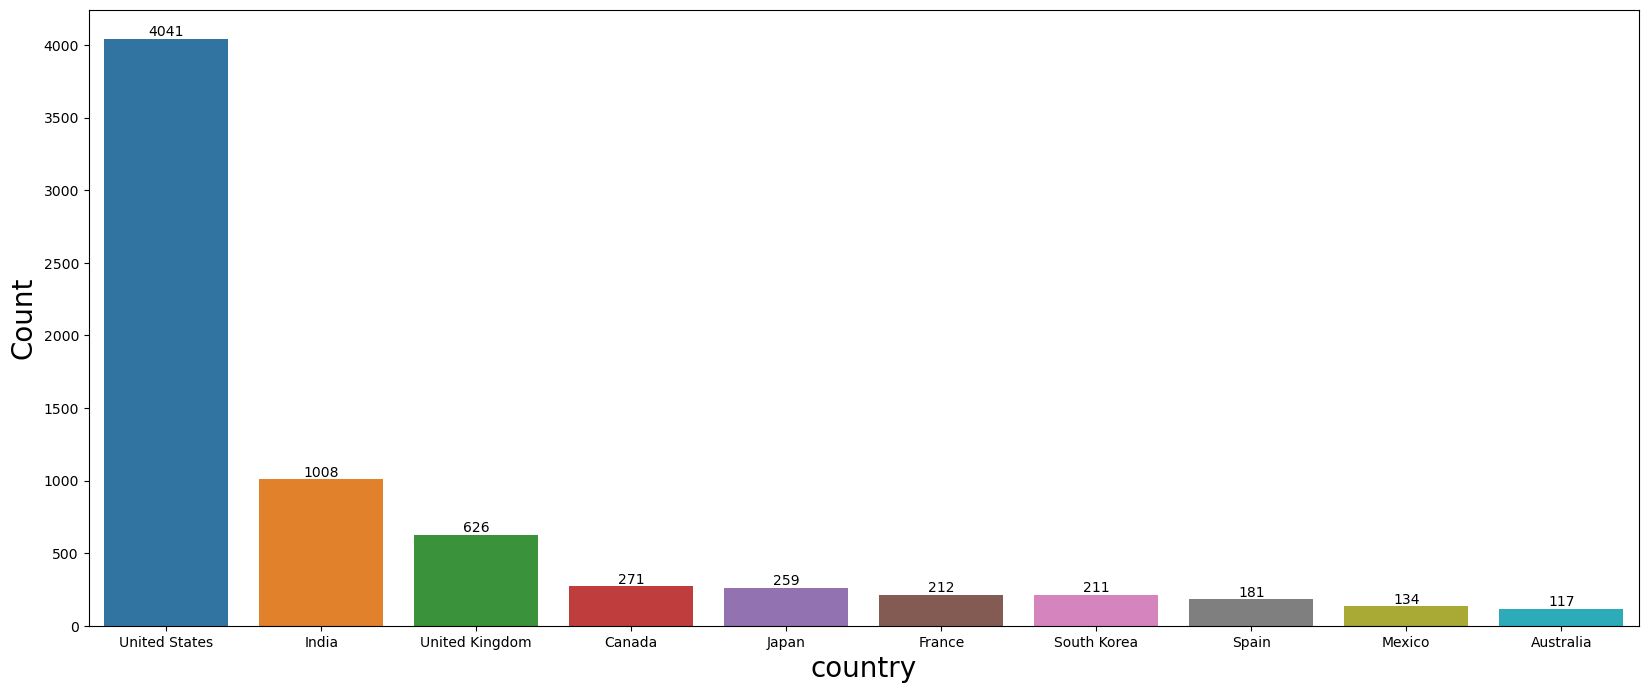

In [19]:
plt.figure(figsize = (20,8))
ax = sns.barplot(y='cnt',x ='country' ,data = top10_country)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('country',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Movies and Shows added each year

Text(0, 0.5, 'Count')

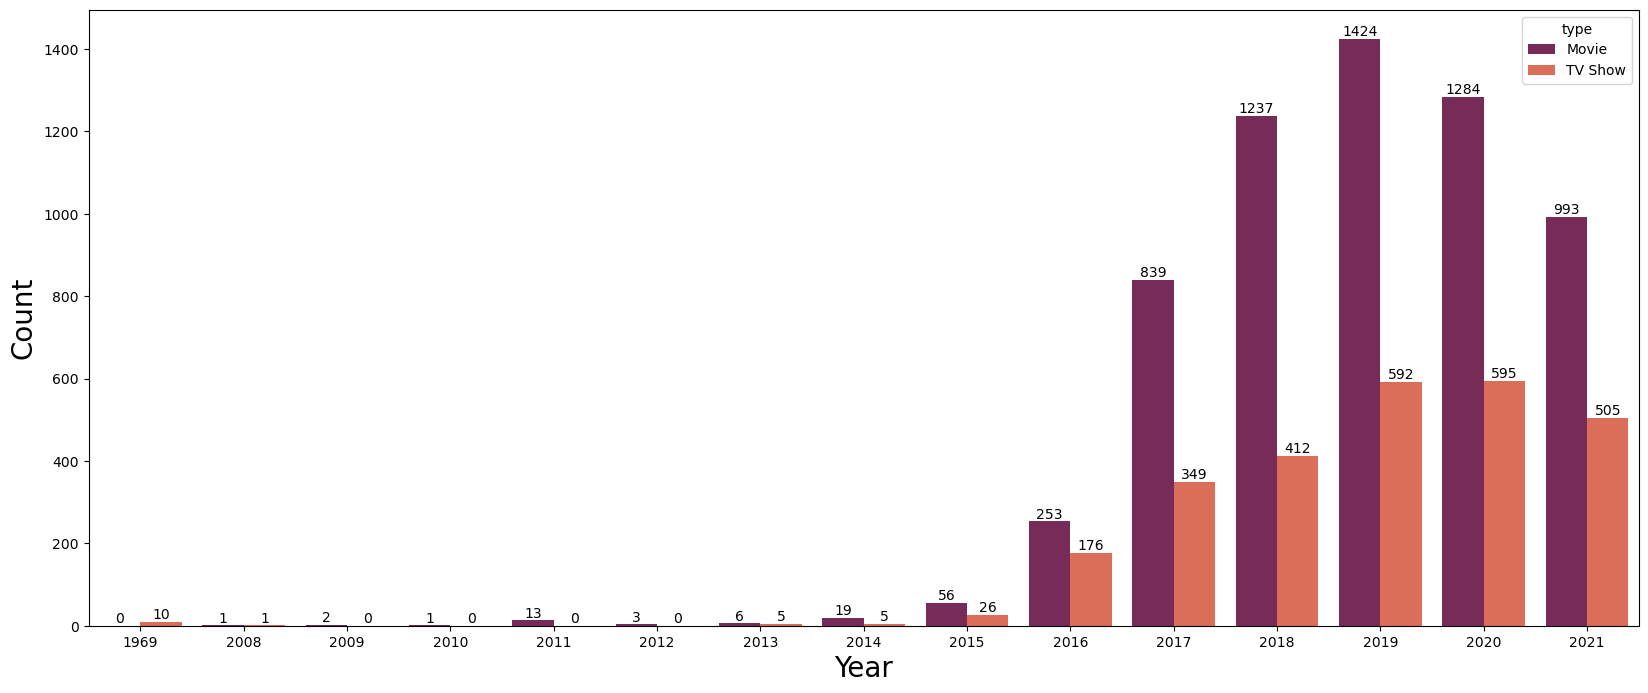

In [20]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x='Year',data = df,hue = 'type',palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Avg No. of Movies and Shows added each month

In [21]:
df1 = df.groupby(['type','Year','Month','Month_Name'])['title'].count().reset_index()
avg_add = df1.groupby(['type','Month','Month_Name'])['title'].mean().round(0).reset_index()
avg_add

,type,Month,Month_Name,title
0,Movie,1,Jan,61.0
1,Movie,2,Feb,42.0
2,Movie,3,Mar,76.0
3,Movie,4,Apr,69.0
4,Movie,5,May,49.0
5,Movie,6,Jun,62.0
6,Movie,7,Jul,71.0
7,Movie,8,Aug,65.0
8,Movie,9,Sep,52.0
9,Movie,10,Oct,61.0


Text(0, 0.5, 'Count')

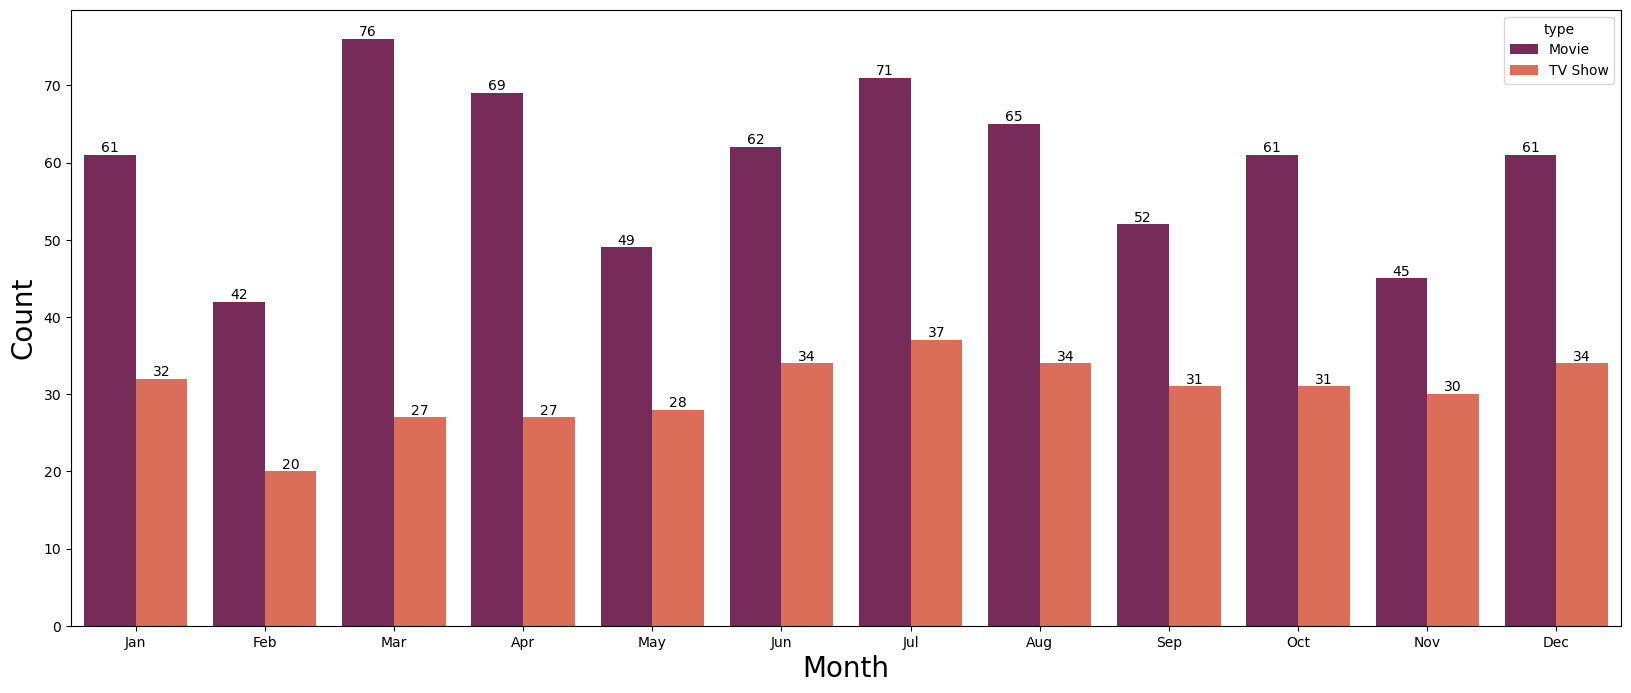

In [22]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x='Month_Name',y='title',data = avg_add ,hue='type',palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Top 10 Directors

In [23]:
top10_dir = df['director'].str.split(', ',expand = True).stack().reset_index()
top10_dir = top10_dir.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'director','level_1':'cnt'})
top10_dir[1:11]

,director,cnt
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
1951,Jay Chapman,12
2945,Martin Scorsese,12


Text(0, 0.5, 'Count')

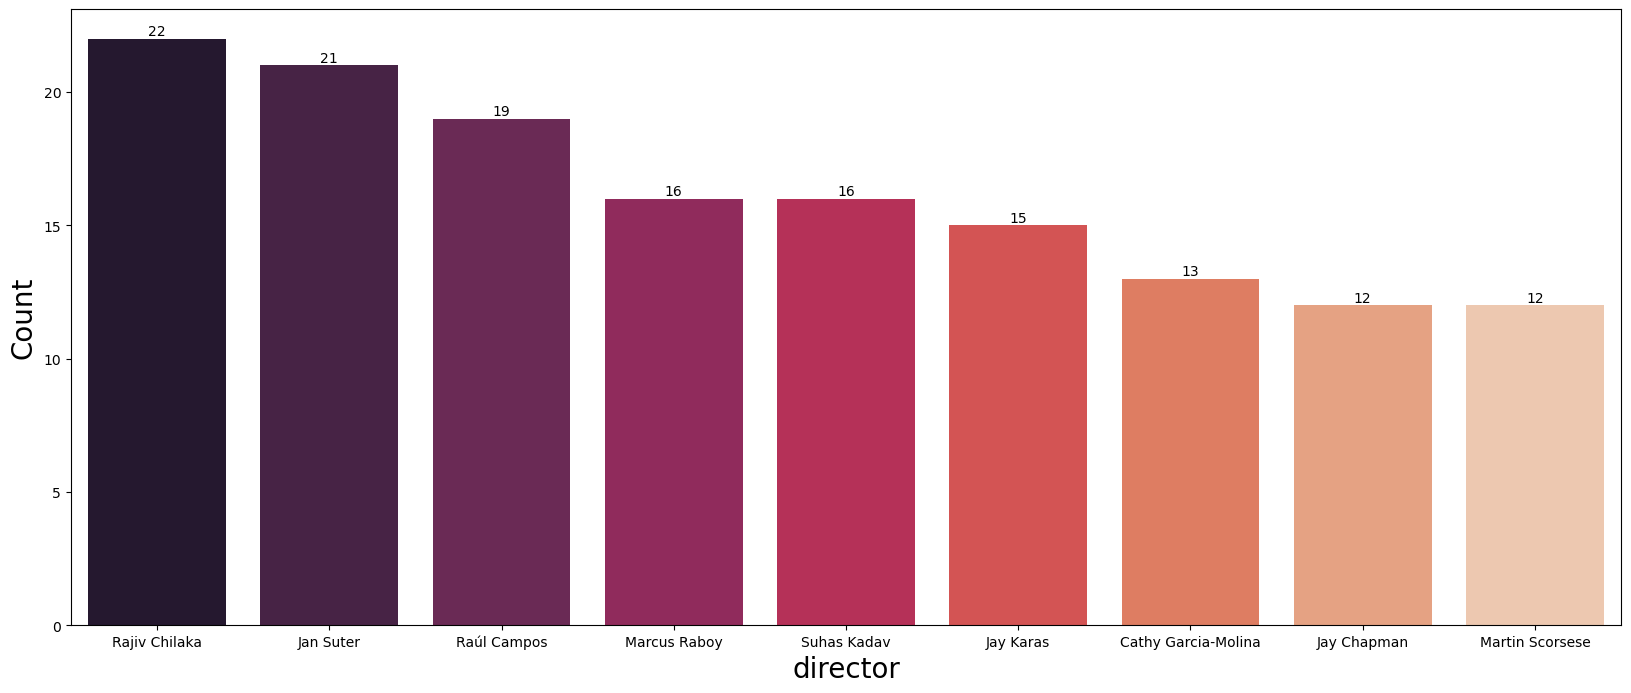

In [24]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x='director',y='cnt',data = top10_dir[1:11],palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('director',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Rating Counts

Text(0, 0.5, 'Count')

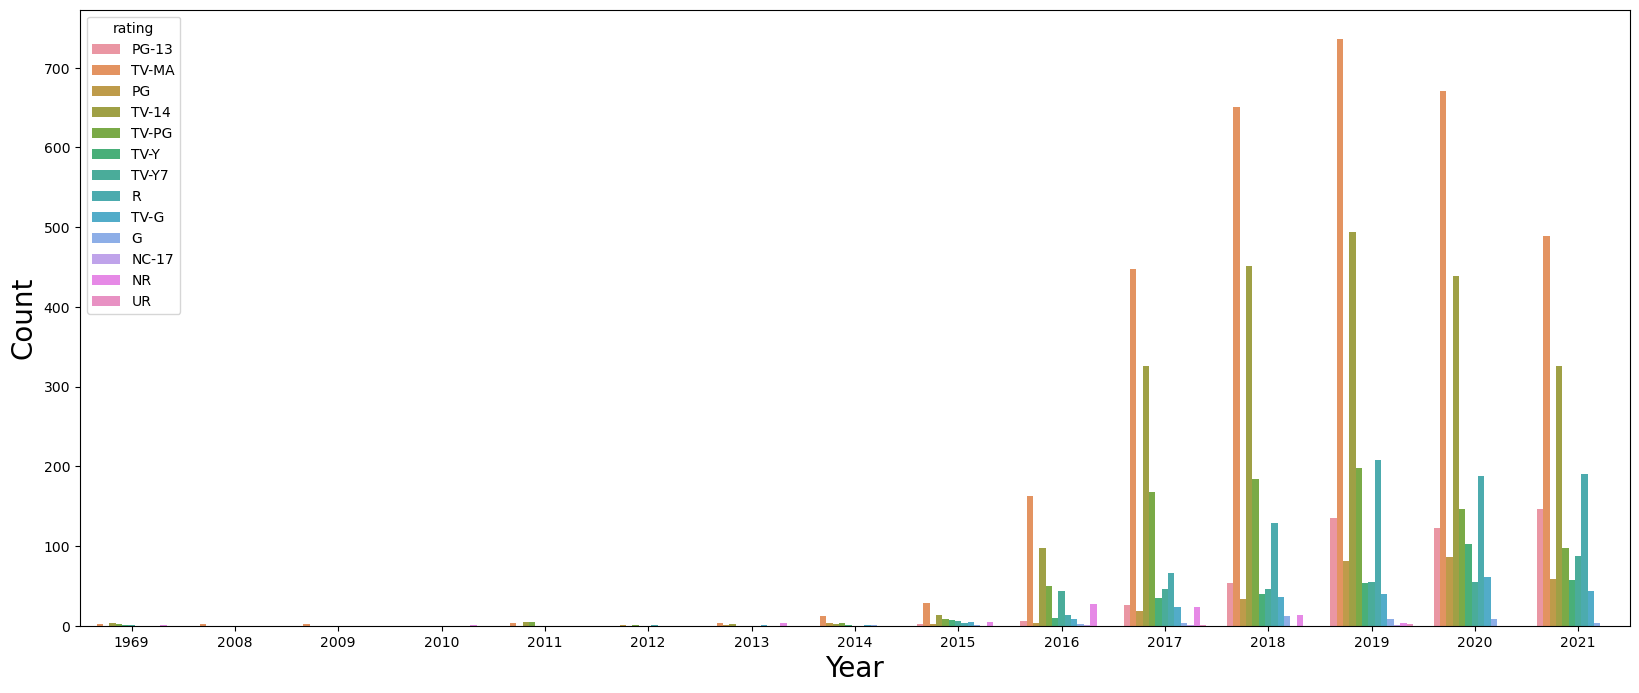

In [25]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x='Year',data=df,hue = 'rating')
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

Text(0, 0.5, 'Count')

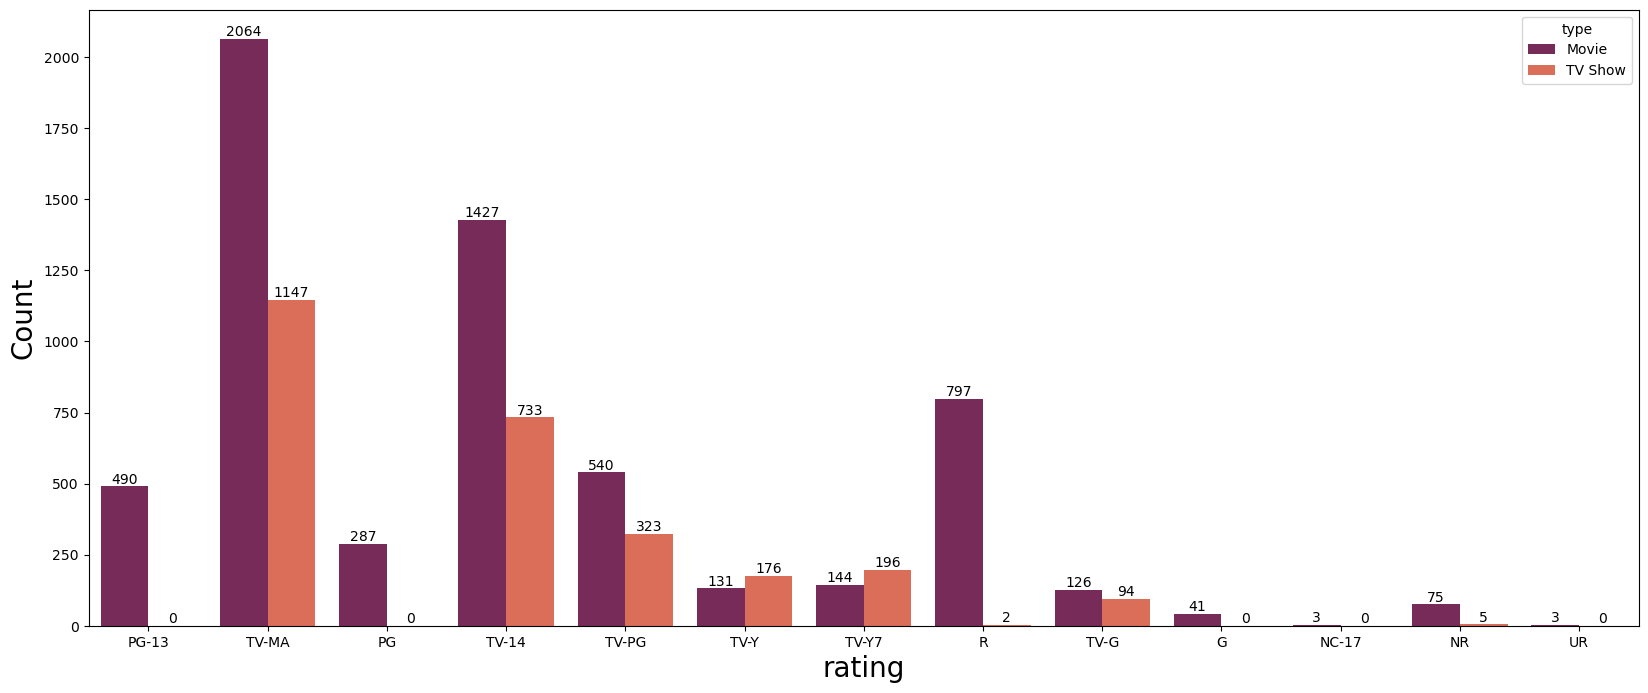

In [26]:
plt.figure(figsize = (20,8))
ax = sns.countplot(x='rating',data=df,hue = 'type',palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('rating',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Top 10 Movie produced country 

In [27]:
top10_country_mov = df.loc[df['type'] == 'Movie','country'].str.split(', ',expand = True).stack().reset_index()
top10_country_mov = top10_country_mov.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'country','level_1':'cnt'})
top10_country_mov

,country,cnt
75,United States,2803
28,India,927
73,United Kingdom,380
10,Canada,187
19,France,148
65,Spain,129
17,Egypt,98
46,Nigeria,87
41,Mexico,86
35,Japan,85


Text(0, 0.5, 'Count')

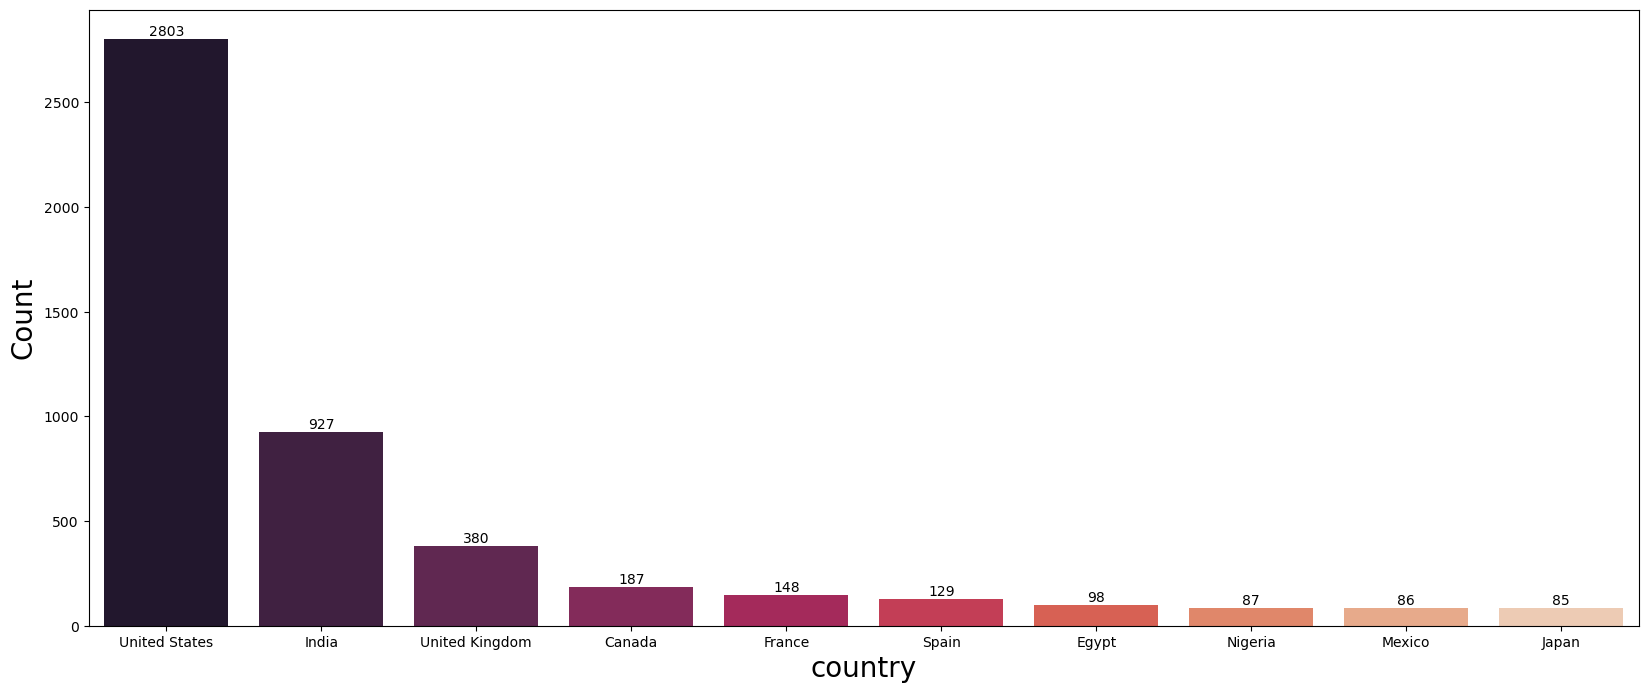

In [28]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x='country',y='cnt',data=top10_country_mov,palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('country',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

In [29]:
top10_country_show = df.loc[df['type'] == 'TV Show','country'].str.split(', ',expand = True).stack().reset_index()
top10_country_show = top10_country_show.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'country','level_1':'cnt'})
top10_country_show

,country,cnt
57,United States,1238
56,United Kingdom,246
26,Japan,174
47,South Korea,164
7,Canada,84
21,India,81
51,Taiwan,70
17,France,64
2,Australia,56
48,Spain,52


Text(0, 0.5, 'Count')

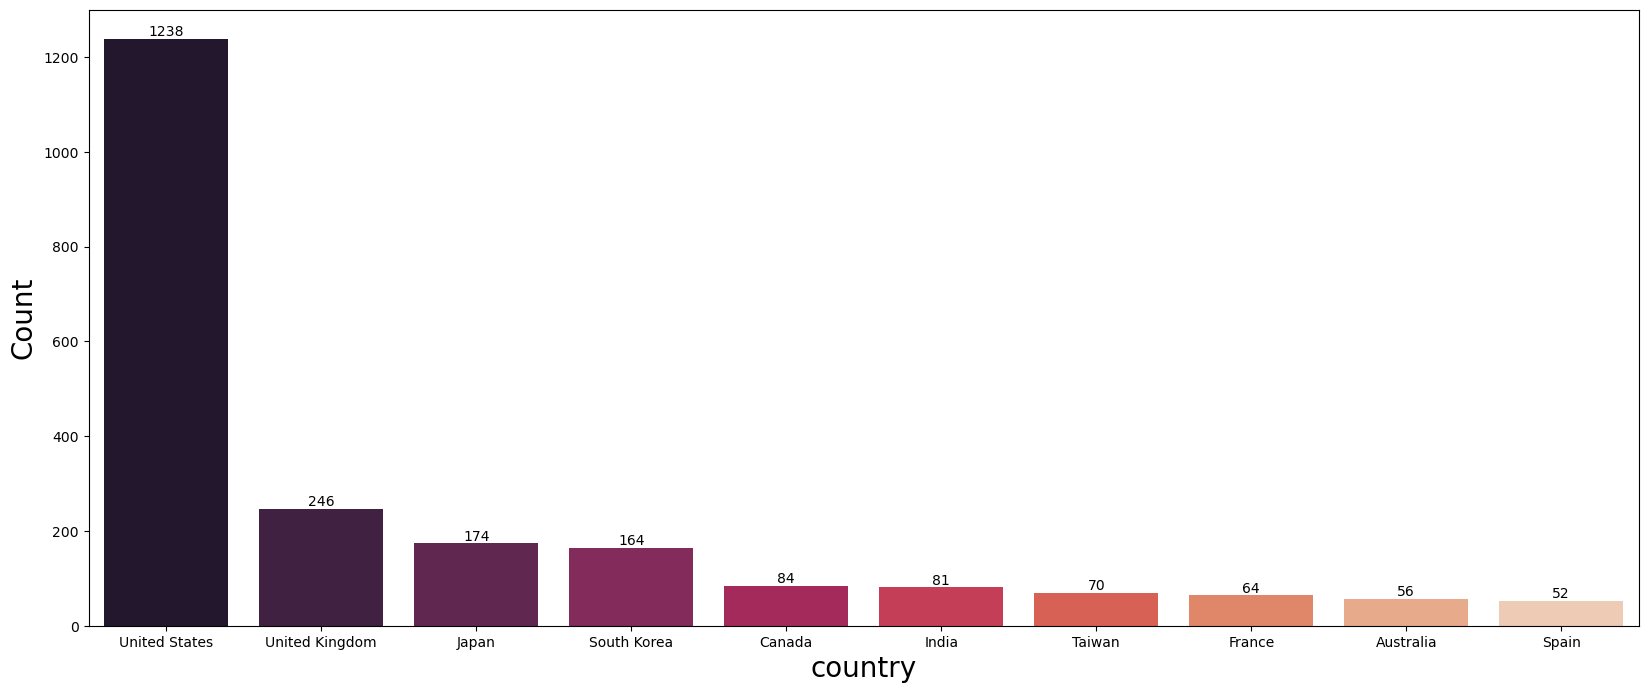

In [30]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x='country',y='cnt',data=top10_country_show,palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('country',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

In [31]:
# Creating movies df
movies = df[df['type'] == 'Movie']

In [32]:
# Creating tvshows df
tvshows = df[df['type'] == 'TV Show']

# Movies released vs. Movies added each year

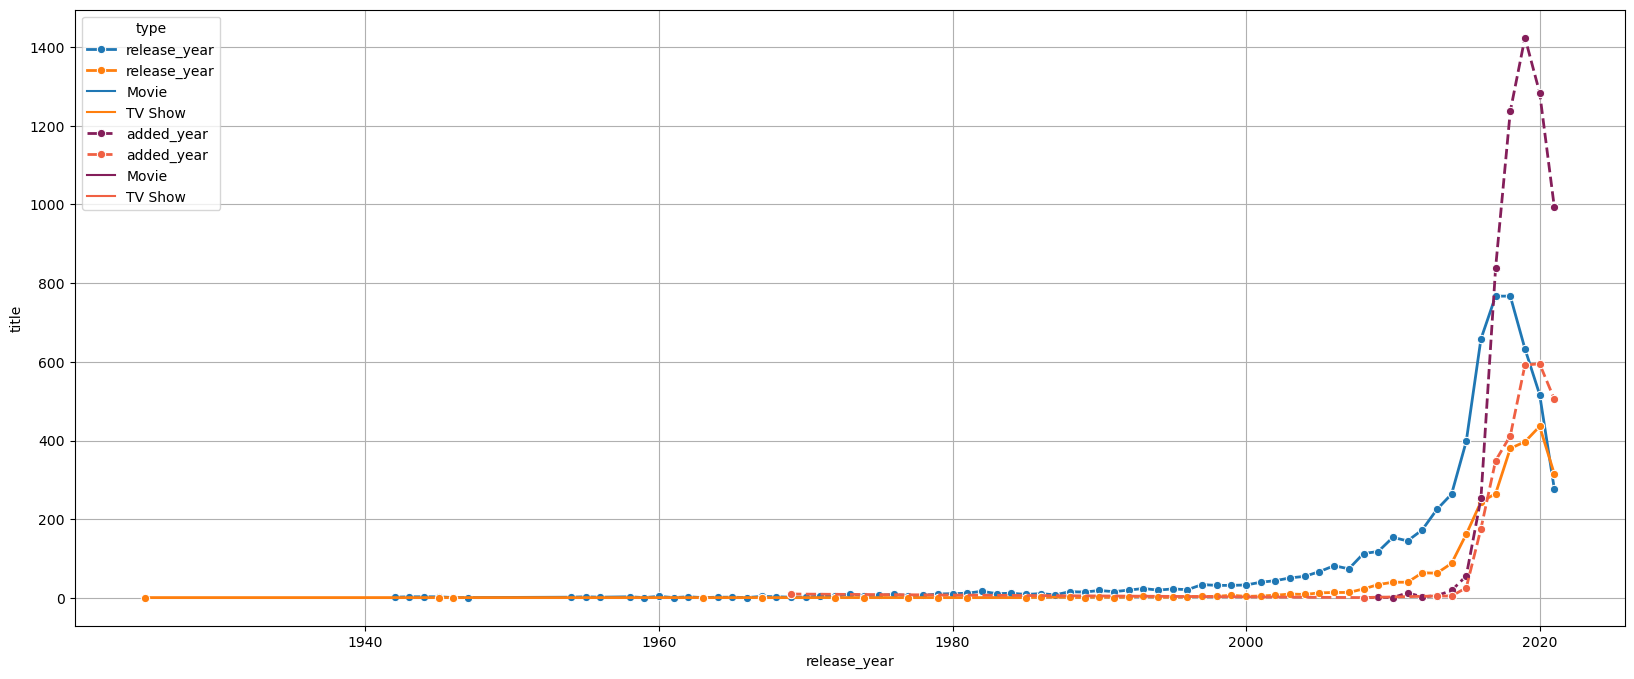

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(x='release_year',y='title',data = df.groupby(['type','release_year'])['title'].count().reset_index() ,hue='type',linewidth = 2,marker='o',label = 'release_year')
sns.lineplot(x='Year',y='title',data = df.groupby(['type','Year'])['title'].count().reset_index() ,hue='type',palette = 'rocket',linestyle = '--',linewidth = 2,marker='o',label ='added_year')
plt.ylim()
plt.grid()

# Avg time taken to add movies and tv shows

In [34]:
movies['date_diff'] = movies['Year'] - movies['release_year']
print('Avg years taken to add released movie to netflix :',movies['date_diff'].mean().round(0))

Avg years taken to add released movie to netflix : 6.0


In [35]:
tvshows['date_diff'] = tvshows['Year'] - tvshows['release_year']
print('Avg years taken to add released tv show to netflix :',tvshows['date_diff'].mean().round(0))

Avg years taken to add released tv show to netflix : 2.0


# Top 10 genre in movies

In [36]:
mov_genre = movies['listed_in'].str.split(', ',expand = True).stack().reset_index()
mov_genre = mov_genre.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'genre','level_1':'cnt'})
mov_genre

,genre,cnt
11,International Movies,2752
7,Dramas,2427
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


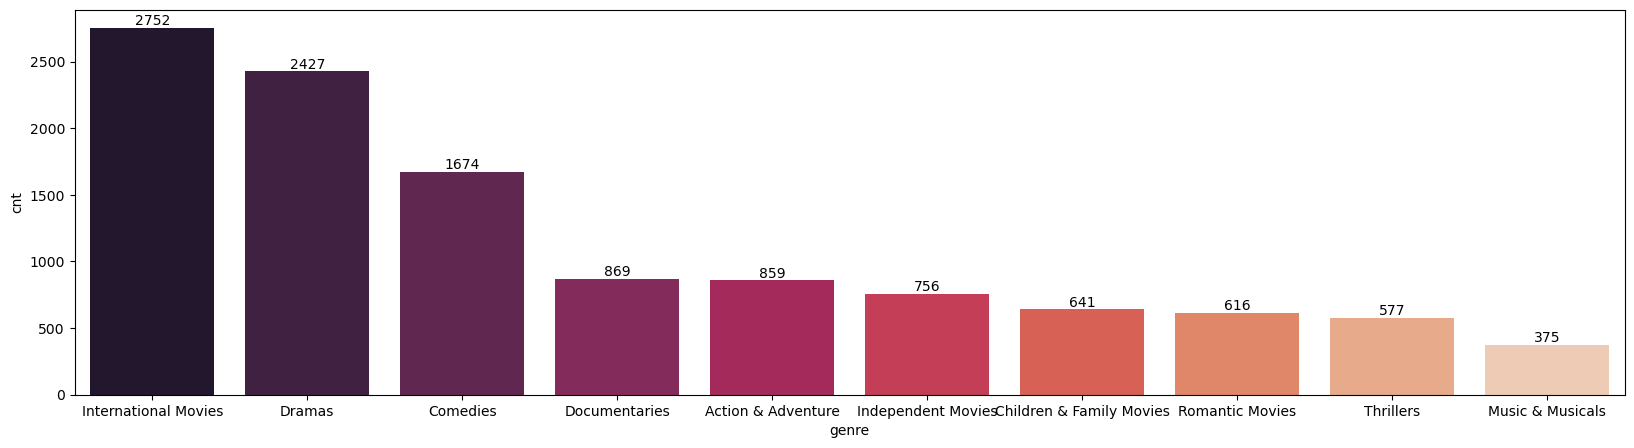

In [37]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='genre',y='cnt',data = mov_genre,palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)

# Top 10 genre in TV Shows

In [38]:
tv_show_genre = tvshows['listed_in'].str.split(', ',expand = True).stack().reset_index()
tv_show_genre = tv_show_genre.groupby(0)['level_1'].count().reset_index().sort_values('level_1',ascending = False).head(10).rename(columns={0:'genre','level_1':'cnt'})
tv_show_genre

,genre,cnt
5,International TV Shows,1351
15,TV Dramas,763
14,TV Comedies,581
3,Crime TV Shows,470
6,Kids' TV,451
4,Docuseries,395
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,253
0,Anime Series,176


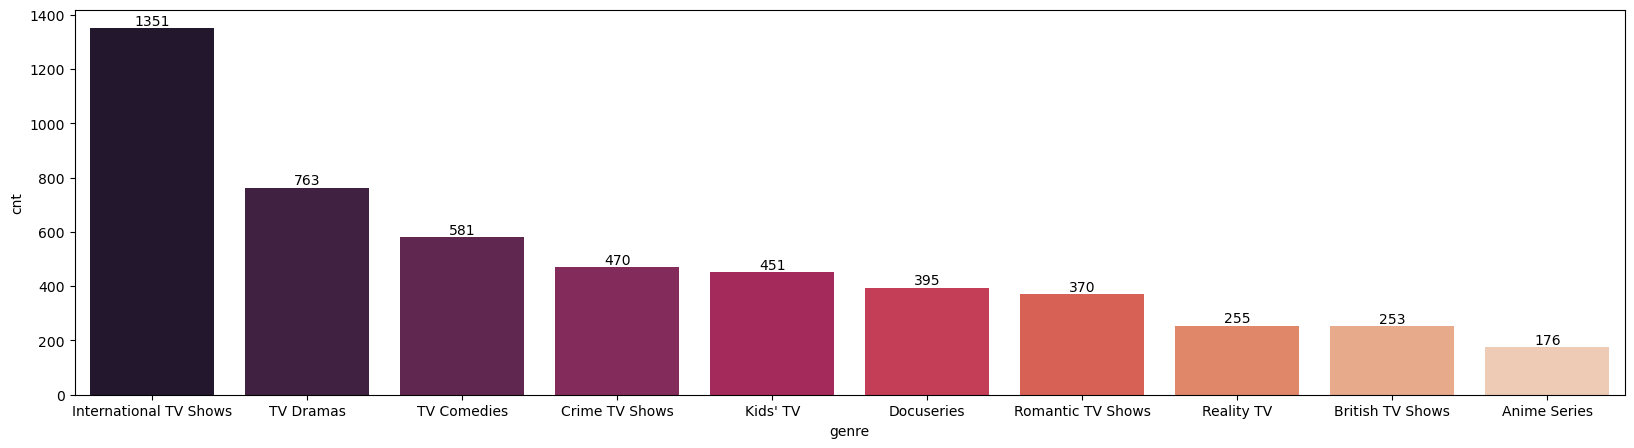

In [39]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='genre',y='cnt',data = tv_show_genre,palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)

# Movies count by week_num

In [40]:
movies.groupby(['Week_Num'])['show_id'].count().reset_index().sort_values(by=['show_id'],ascending=False).head(10)

,Week_Num,show_id
26,26,256
13,13,226
0,00,210
39,39,200
22,22,184
35,35,178
9,09,174
43,43,162
31,31,156
30,30,150


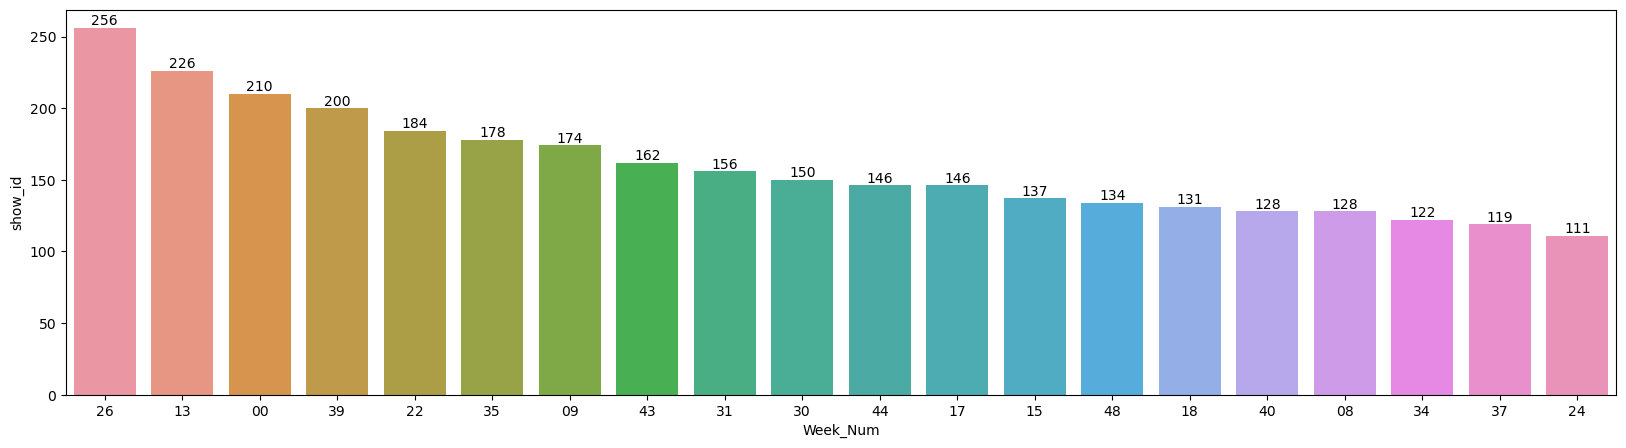

In [41]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'Week_Num',y = 'show_id',data = movies.groupby(['Week_Num'])['show_id'].count().reset_index().sort_values(by=['show_id'],ascending=False).head(20))
for bars in ax.containers:
    ax.bar_label(bars)

# TV Show count by week_num

In [42]:
tvshows.groupby(['Week_Num'])['show_id'].count().reset_index().sort_values(by=['show_id'],ascending=False).head(10)

,Week_Num,show_id
13,13,92
39,39,92
26,26,91
31,31,85
50,50,76
27,27,75
35,35,72
48,48,68
37,37,65
0,00,65


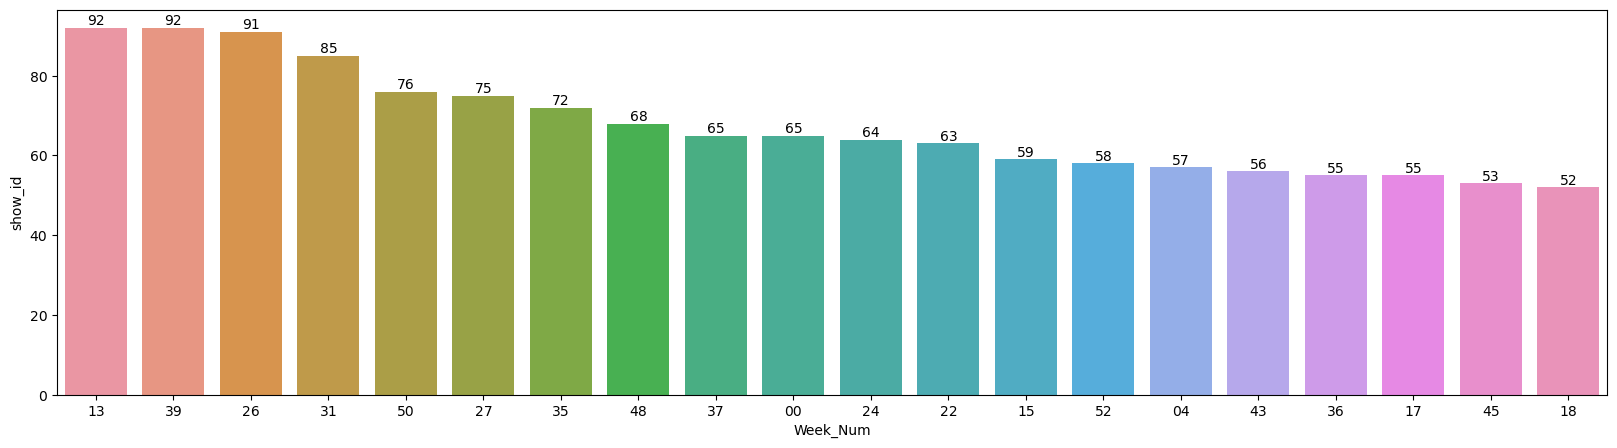

In [43]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'Week_Num',y = 'show_id',data = tvshows.groupby(['Week_Num'])['show_id'].count().reset_index().sort_values(by=['show_id'],ascending=False).head(20))
for bars in ax.containers:
    ax.bar_label(bars)

# Top 10 movies actors

In [44]:
mov_actors = movies['cast'].str.split(', ',expand = True).stack().reset_index()
mov_actors = mov_actors.groupby(0)['level_0'].count().reset_index().sort_values('level_0',ascending = False)[1:11]
mov_actors

,0,level_0
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
18064,Om Puri,30
638,Akshay Kumar,30
18329,Paresh Rawal,28
12031,Julie Tejwani,28
1313,Amitabh Bachchan,28
3354,Boman Irani,27
20692,Rupa Bhimani,27


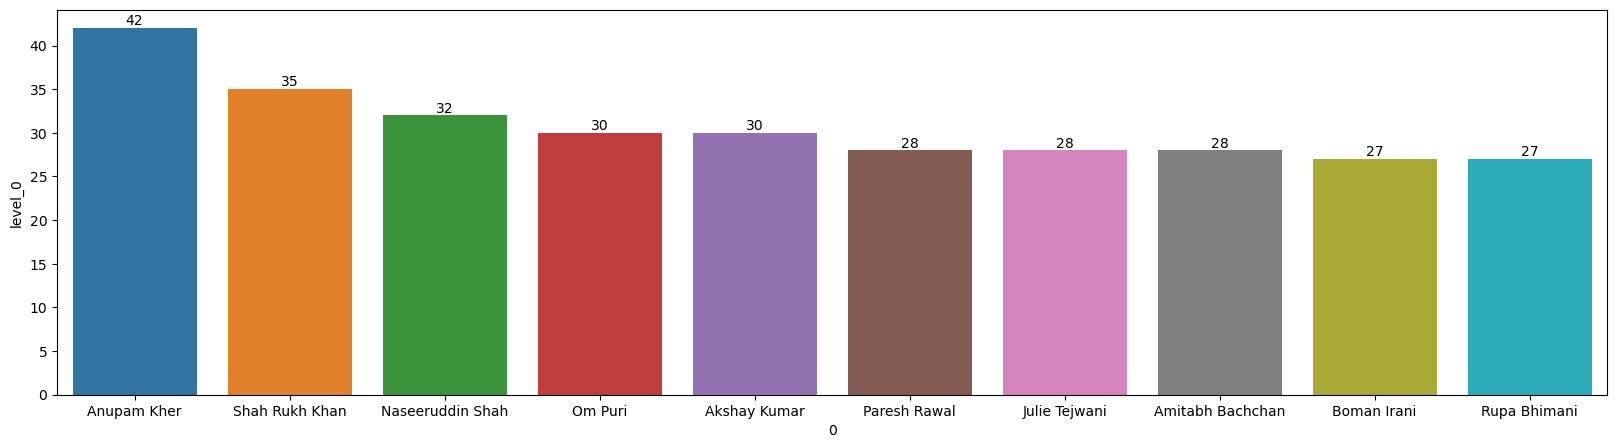

In [45]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 0,y = 'level_0',data = mov_actors)
for bars in ax.containers:
    ax.bar_label(bars)

# Top 10 TV Show actors

In [46]:
tv_actors = tvshows['cast'].str.split(', ',expand = True).stack().reset_index()
tv_actors = tv_actors[0].value_counts()[1:11].reset_index().rename({'index':'actor','0':'cnt'})
tv_actors

,index,0
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Yoshitsugu Matsuoka,13


Text(0, 0.5, 'Count')

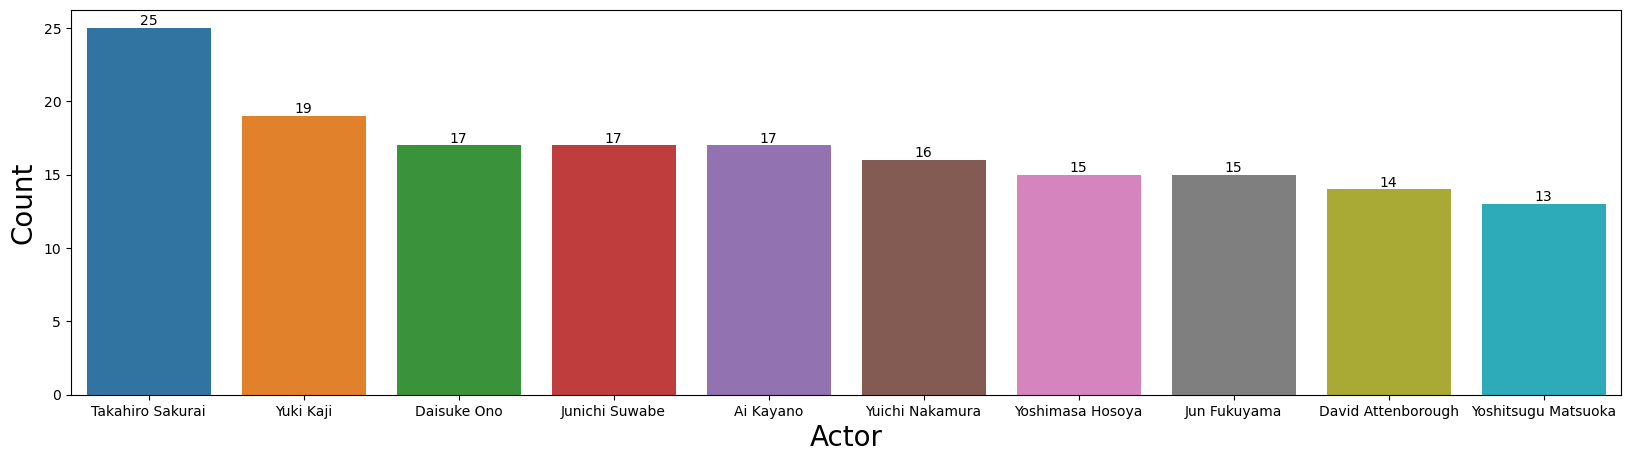

In [47]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = tv_actors.iloc[:,0],y=tv_actors.iloc[:,1] )
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Actor',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Duration Analysis

In [48]:
movies['duration'] = movies['duration'].str.split(expand = True)[0]
movies['duration'] = movies['duration'].fillna(movies['duration'].mode()[0])
movies['duration'] = movies['duration'].astype('int64')

<Axes: xlabel='duration', ylabel='Count'>

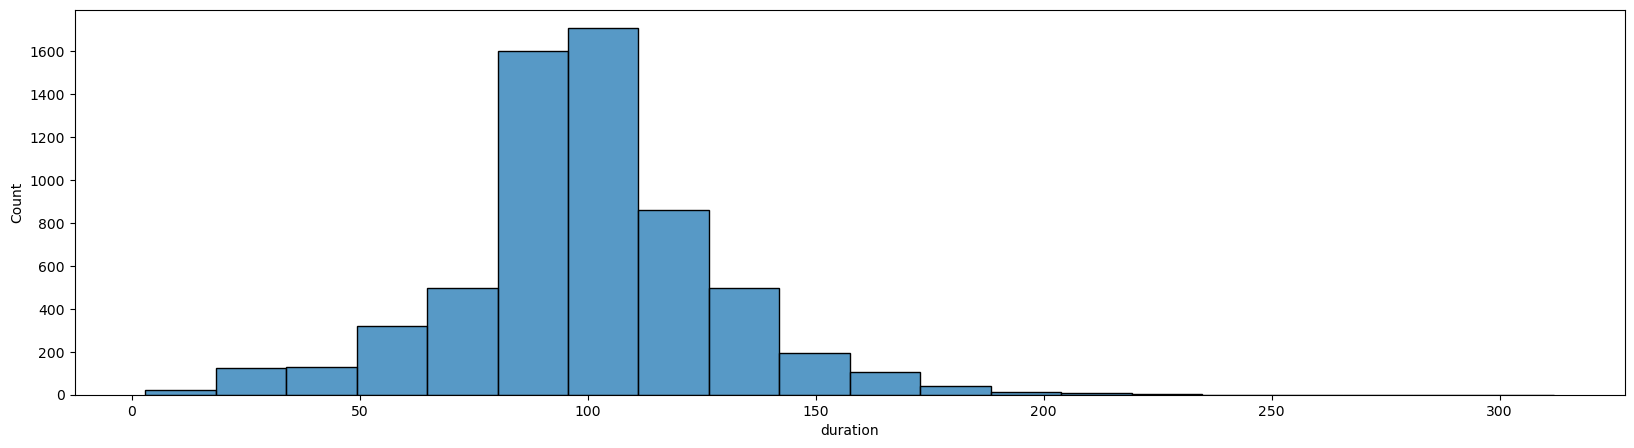

In [49]:
plt.figure(figsize=(20,5))
sns.histplot(x='duration',data = movies,bins = 20)

In [50]:
tvshows['duration'] = tvshows['duration'].str.split(expand = True)[0]
tvshows['duration'] = tvshows['duration'].astype('int')

<Axes: xlabel='duration', ylabel='Count'>

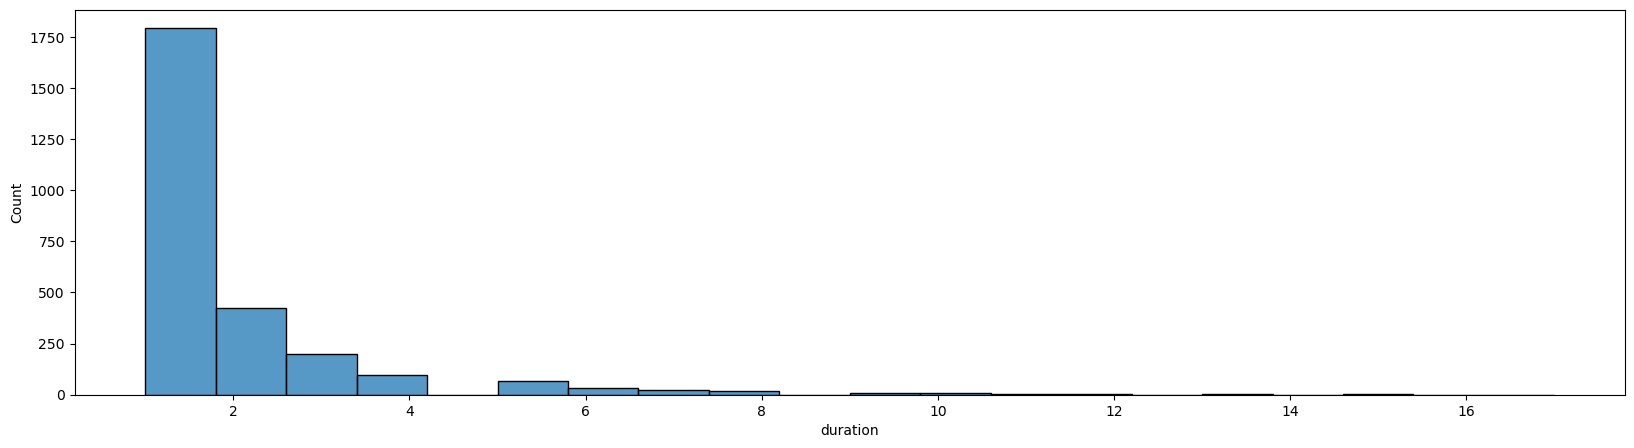

In [51]:
plt.figure(figsize=(20,5))
sns.histplot(x='duration',data = tvshows,bins = 20)

# Removing nested columns using split and merge

In [52]:
df.set_index('title',inplace = True)

In [53]:
# Splitting comma separated value using split and stacking them
cast_split = df['cast'].str.split(', ',expand = True).stack().reset_index().rename(columns = {0:'cast'})
cast_split[['title','cast']]

,title,cast
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [54]:
country_split = df['country'].str.split(', ',expand = True).stack().reset_index().rename(columns = {0:'country'})
country_split[['title','country']]

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States
3,Jailbirds New Orleans,United States
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,United States
8804,Zombieland,United States
8805,Zoom,United States


In [55]:
listed_in_split = df['listed_in'].str.split(', ',expand = True).stack().reset_index().rename(columns = {0:'genre'})
listed_in_split[['title','genre']]

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [56]:
dir_split = df['director'].str.split(', ',expand = True).stack().reset_index().rename(columns = {0:'director'})
dir_split[['title','director']]

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Unknown
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [57]:
new_df = df.merge(listed_in_split[['title','genre']],how='left',on='title').merge(country_split[['title','country']],how='left',on='title').merge(cast_split[['title','cast']],how='left',on='title').merge(dir_split[['title','director']],how='left',on='title')
new_df

,title,show_id,type,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in,description,Year,Month,Month_Name,Week_Num,genre,country_y,cast_y,director_y
0,Dick Johnson Is Dead,s1,Movie,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Sep,38,Documentaries,United States,Unknown,Kirsten Johnson
1,Blood & Water,s2,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,38,International TV Shows,South Africa,Ama Qamata,Unknown
2,Blood & Water,s2,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,38,International TV Shows,South Africa,Khosi Ngema,Unknown
3,Blood & Water,s2,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,38,International TV Shows,South Africa,Gail Mabalane,Unknown
4,Blood & Water,s2,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Sep,38,International TV Shows,South Africa,Thabang Molaba,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161211,Zubaan,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Mar,08,Music & Musicals,India,Manish Chaudhary,Mozez Singh
161212,Zubaan,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Mar,08,Music & Musicals,India,Meghna Malik,Mozez Singh
161213,Zubaan,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Mar,08,Music & Musicals,India,Malkeet Rauni,Mozez Singh
161214,Zubaan,s8807,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Mar,08,Music & Musicals,India,Anita Shabdish,Mozez Singh


In [58]:
new_df[new_df['type'] == 'Movie'].groupby(['cast_y','director_y'])['title'].nunique().reset_index().sort_values('title',ascending = False)[1:2]

,cast_y,director_y,title
34901,Rajesh Kava,Rajiv Chilaka,19


In [59]:
new_df[new_df['type'] == 'TV Show'].groupby(['cast_y','director_y'])['title'].nunique().reset_index().sort_values('title',ascending = False)

,cast_y,director_y,title
15097,Unknown,Unknown,298
14316,Takahiro Sakurai,Unknown,24
15848,Yuki Kaji,Unknown,18
15828,Yuichi Nakamura,Unknown,16
3107,Daisuke Ono,Unknown,16
...,...,...,...
5837,Ivana Lotito,Unknown,1
5838,Ivar Kants,Unknown,1
5839,Ivonne Coll,Unknown,1
5840,Ivonne Montero,Unknown,1


In [60]:
movie_new_df = new_df.loc[new_df['type'] == 'Movie']

In [61]:
tvshow_new_df = new_df.loc[new_df['type'] == 'TV Show']

In [62]:
movie_new_df['duration'] = movie_new_df['duration'].str.split(expand=True)[0]

In [63]:
movie_new_df ['duration'].mode()[0]

'94'

In [64]:
movie_new_df ['duration'] = movie_new_df ['duration'].fillna(movie_new_df ['duration'].mode()[0])

In [65]:
movie_new_df ['duration'] = movie_new_df ['duration'].astype('int64')

In [66]:
movie_new_df.groupby('release_year')['duration'].mean().reset_index()

,release_year,duration
0,1942,29.333333
1,1943,66.200000
2,1944,65.714286
3,1945,57.166667
4,1946,58.000000
...,...,...
68,2017,102.587993
69,2018,104.787703
70,2019,101.328797
71,2020,101.691947


<Axes: xlabel='release_year', ylabel='duration'>

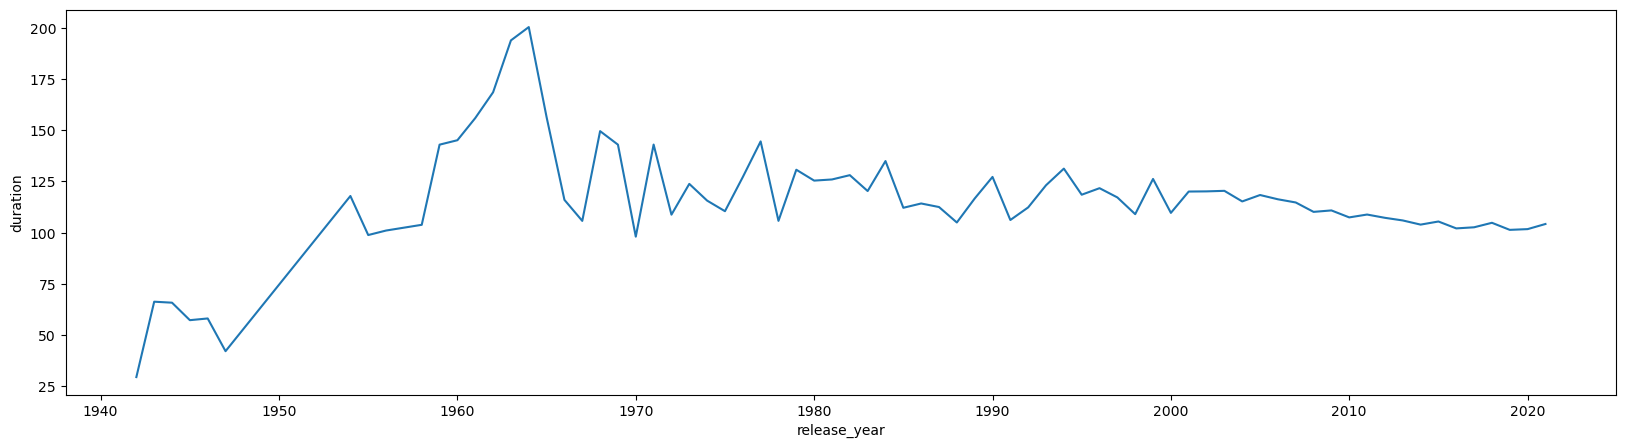

In [67]:
plt.figure(figsize=(20,5))
sns.lineplot(x='release_year',y = 'duration',data = movie_new_df.groupby('release_year')['duration'].mean().reset_index())

<Axes: ylabel='duration'>

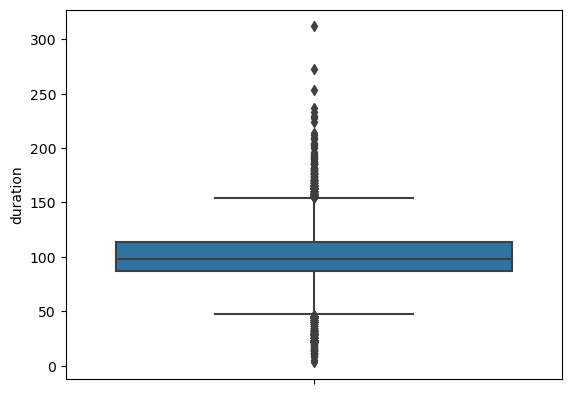

In [68]:
sns.boxplot(y='duration',data = movie_new_df[['title','duration']].drop_duplicates())

In [69]:
# Avg runtime by actors
movie_new_df.groupby('cast_y')['duration'].mean().round(2).reset_index().sort_values('duration',ascending = False)

,cast_y,duration
2475,Asim Chaudhry,312.0
7752,Fionn Whitehead,312.0
5150,Craig Parkinson,312.0
5610,Darren Pettie,273.0
22299,Simon Prebble,273.0
...,...,...
6799,Ehab Shaaban,12.0
22809,Steven Bognar,10.0
11964,Julia Reichert,10.0
19156,President Barack Obama,10.0


In [70]:
# Avg runtime by director and cast
movie_new_df.groupby(['director_y','cast_y'])['duration'].mean().round(2).reset_index().sort_values('duration',ascending = False).head(20)

,director_y,cast_y,duration
44242,Unknown,Fionn Whitehead,312.0
44183,Unknown,Craig Parkinson,312.0
44121,Unknown,Asim Chaudhry,312.0
44586,Unknown,Will Poulter,312.0
44094,Unknown,Alice Lowe,312.0
44346,Unknown,Kate Seftel,273.0
44236,Unknown,Evelyn Lewis Prieto,273.0
44187,Unknown,Darren Pettie,273.0
44111,Unknown,Andy Puddicombe,273.0
44487,Unknown,Rhiannon Mcgavin,273.0


In [71]:
tvshow_new_df['duration'] = tvshow_new_df['duration'].str.split(expand=True)[0]

In [72]:
tvshow_new_df['duration'] = tvshow_new_df['duration'].astype('int')

In [73]:
# Avg runtime by cast
tvshow_new_df.groupby('cast_y')['duration'].mean().round(2).reset_index().sort_values('duration',ascending = False).head(20)

,cast_y,duration
10749,Patrick Dempsey,17.0
2248,Chandra Wilson,17.0
7325,Kevin McKidd,17.0
13189,T.R. Knight,17.0
6829,Justin Chambers,17.0
3796,Ellen Pompeo,17.0
6043,Jessica Capshaw,17.0
3959,Eric Dane,17.0
5658,James Pickens Jr.,17.0
5960,Jensen Ackles,15.0


<Axes: ylabel='duration'>

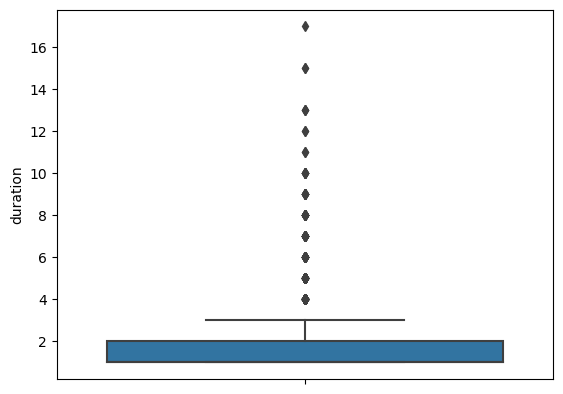

In [74]:
sns.boxplot(y='duration',data = tvshow_new_df[['title','duration']].drop_duplicates())

In [75]:
# Avg runtime by director and cast
tvshow_new_df.groupby(['director_y','cast_y'])['duration'].mean().round(2).reset_index().sort_values('duration',ascending = False).head(20)

,director_y,cast_y,duration
9058,Unknown,Kevin McKidd,17.0
5770,Unknown,Ellen Pompeo,17.0
7848,Unknown,Jessica Capshaw,17.0
4687,Unknown,Chyler Leigh,17.0
5918,Unknown,Eric Dane,17.0
12212,Unknown,Patrick Dempsey,17.0
8590,Unknown,Justin Chambers,17.0
4340,Unknown,Chandra Wilson,17.0
7490,Unknown,James Pickens Jr.,17.0
14442,Unknown,T.R. Knight,17.0


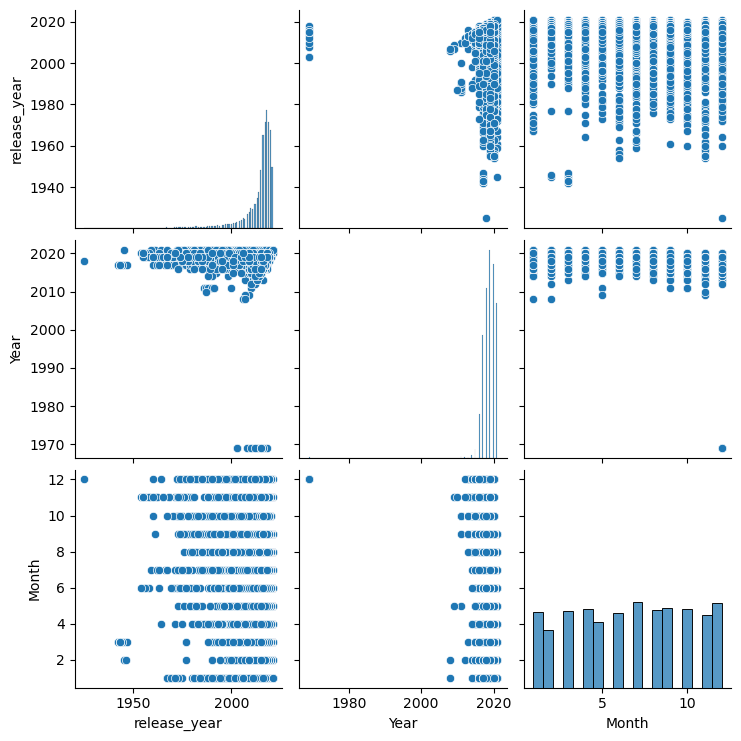

In [76]:
sns.pairplot(df)

# Genre Correlation Analysis

In [77]:
genre_df = pd.read_csv('Downloads/Netflix.csv')

In [78]:
# Creating separate movie genre df
mov_genre_df = genre_df.loc[genre_df['type']=='Movie',['type','listed_in']]

# Creating list of all movie genre
mov_lst = mov_genre_df['listed_in'].str.split(', ',expand = True).stack().reset_index()[0].unique()

# Creating df with zeros of size mov_genre_df and mov_lst
df1 = pd.DataFrame(np.zeros((len(mov_genre_df),len(mov_lst))),columns = mov_lst,index = mov_genre_df.index)

# Updating values to 1 or 0 for particular cols if value present in list
for i in mov_lst:
    df1[i] = mov_genre_df['listed_in'].apply(lambda x : 1 if i in x else 0)
    
# Finally concating to mov_genre_df
mov_genre_df = pd.concat([mov_genre_df,df1],axis = 1)

<Axes: >

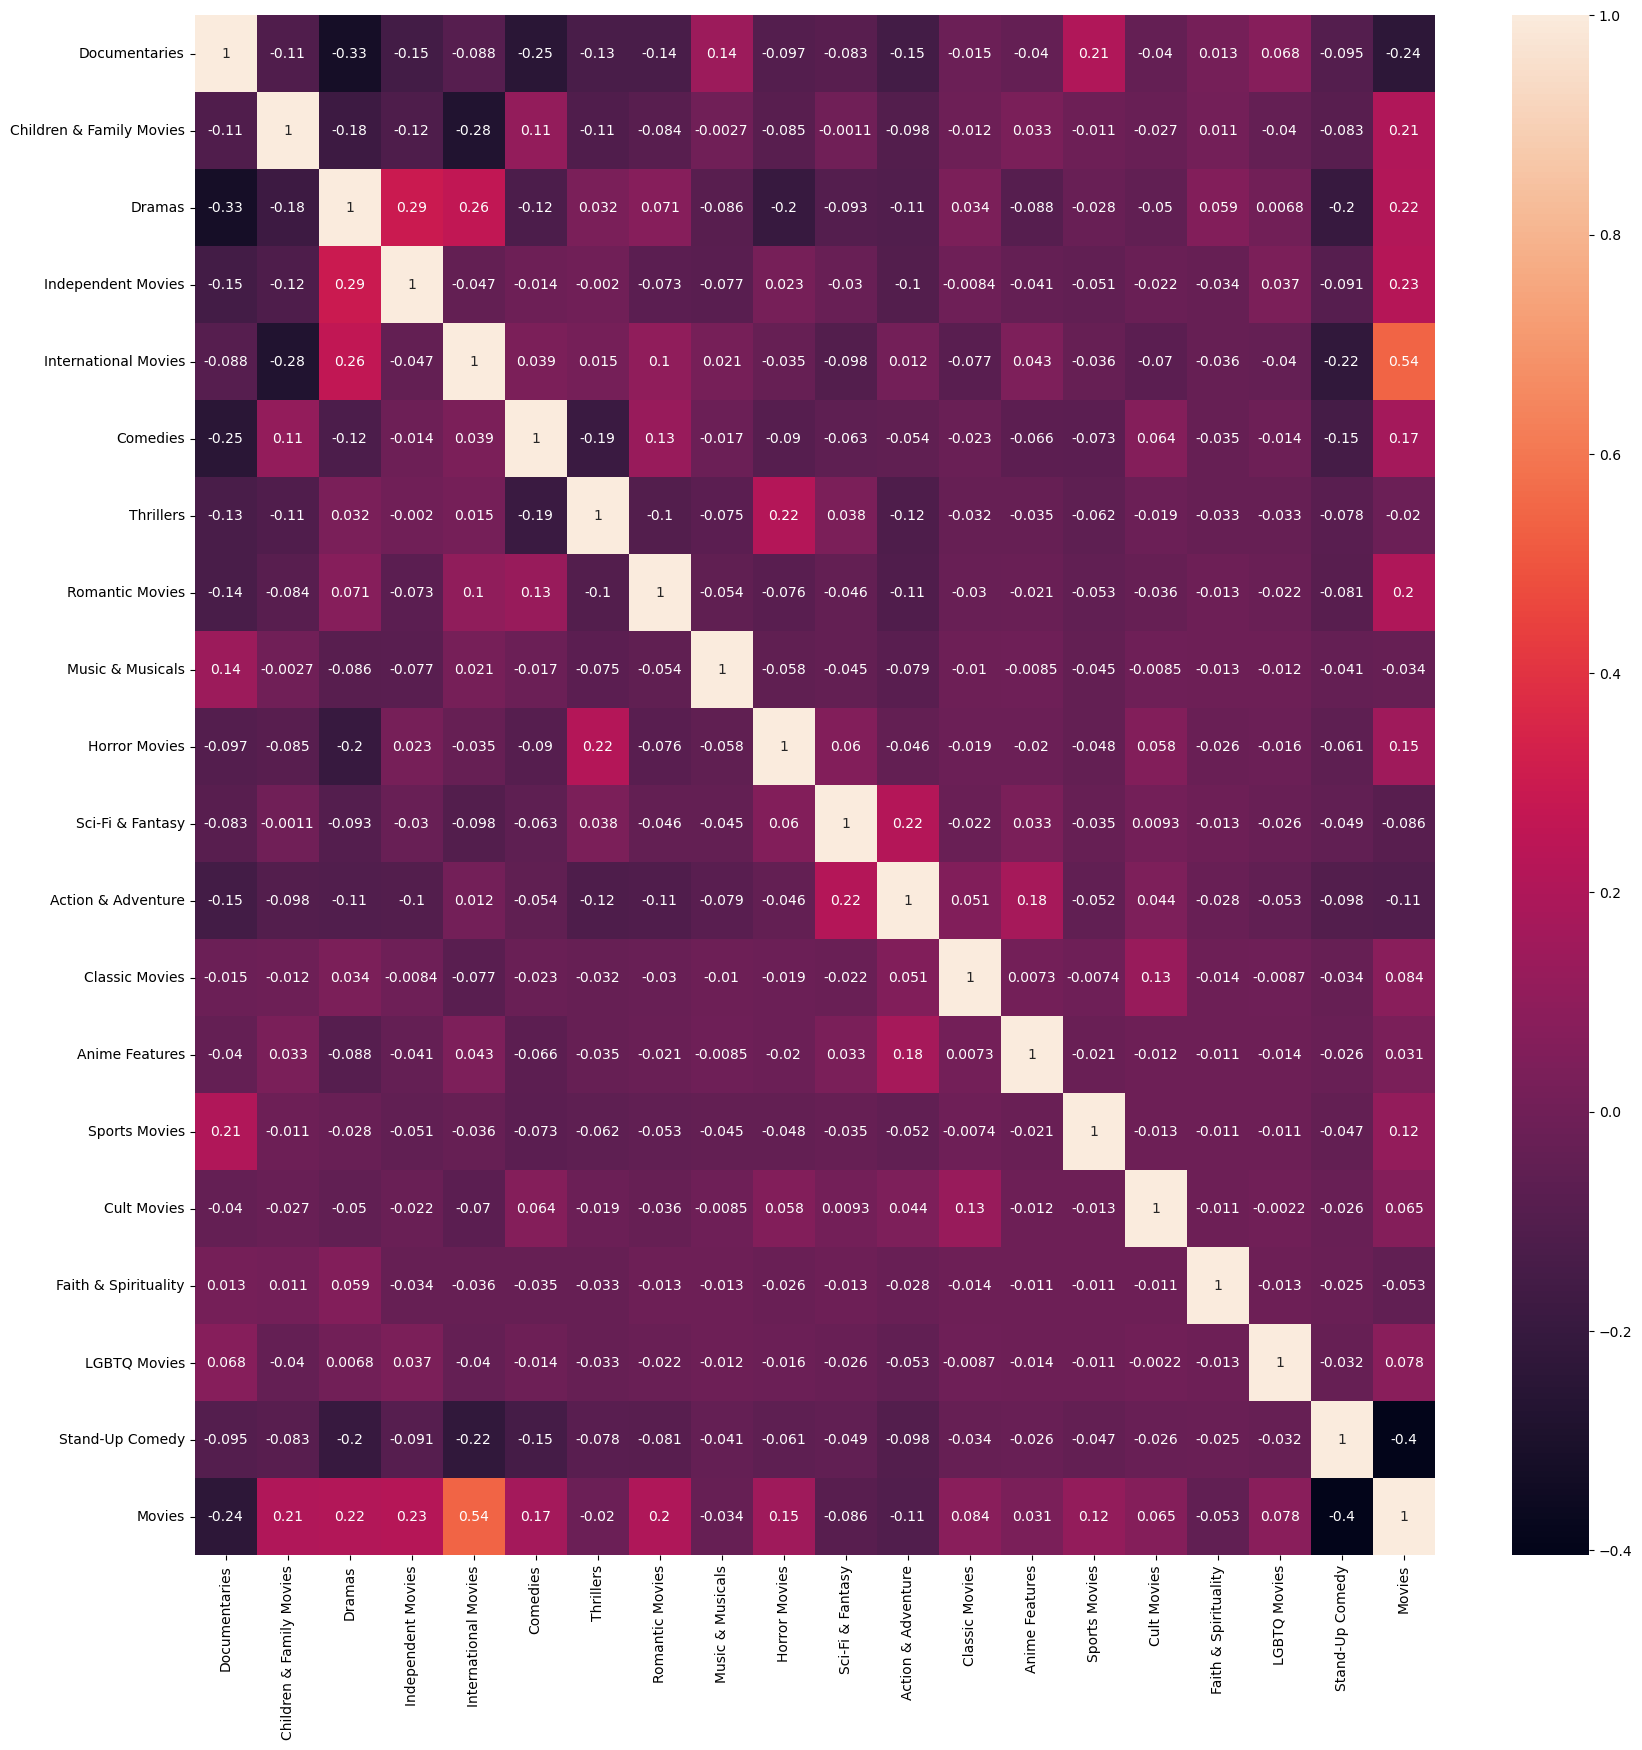

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(mov_genre_df.corr(),annot = True)

In [80]:
# followed same steps as above 
tvshow_genre_df = genre_df.loc[genre_df['type']=='TV Show',['type','listed_in']]
tvshow_lst = tvshow_genre_df['listed_in'].str.split(', ',expand = True).stack().reset_index()[0].unique()
df1 = pd.DataFrame(np.zeros((len(tvshow_genre_df),len(tvshow_lst))),columns = tvshow_lst,index = tvshow_genre_df.index)
for i in tvshow_lst:
    df1[i] = tvshow_genre_df['listed_in'].apply(lambda x : 1 if i in x else 0)
tvshow_genre_df = pd.concat([tvshow_genre_df,df1],axis = 1)

<Axes: >

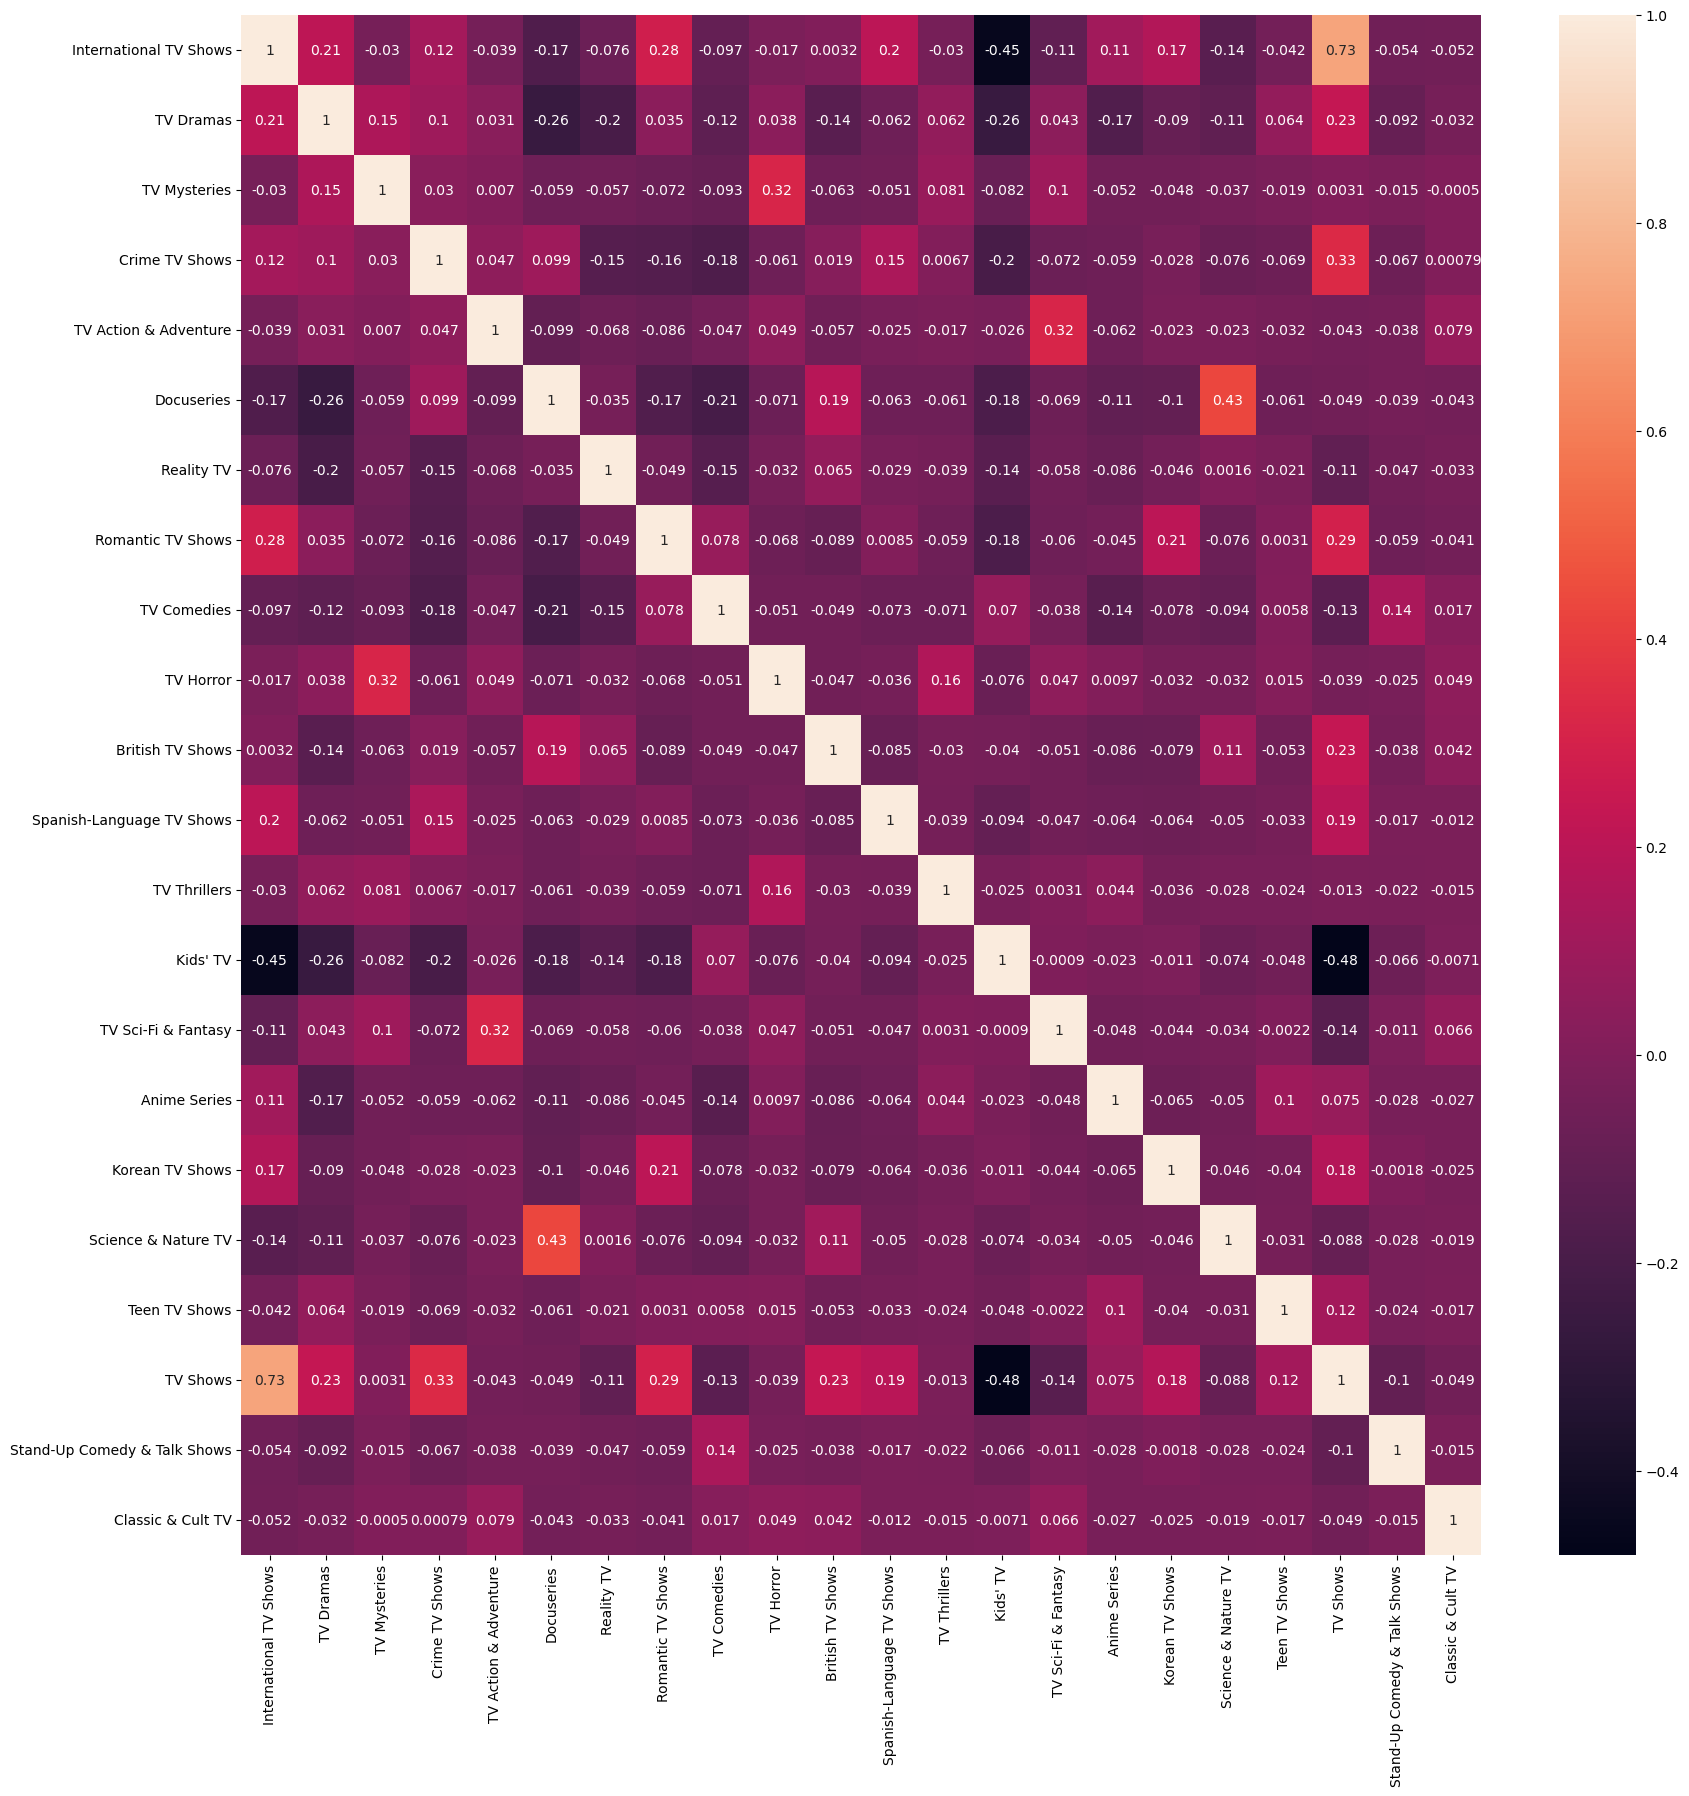

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(tvshow_genre_df.corr(),annot = True)

# Business Insights

# Recomendations